In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
transformer_results = pd.read_csv("/scratch/ajk4yq/ecg/models/transformer-age-history.csv")

In [5]:
cnn_results = pd.read_csv("/scratch/ajk4yq/ecg/models/cnn-age-history.csv")

In [6]:
resnet_results = pd.read_csv("/scratch/ajk4yq/ecg/models/resnet-age-history.csv")

In [9]:
resnet2_results = pd.read_csv("/scratch/ajk4yq/ecg/models/resnet-age2-history.csv")

In [14]:
transformer_results['Model'] = ['Transformer']*10

In [30]:
results = [transformer_results, cnn_results, resnet_results, resnet2_results]
labels = ['Transformer', 'CNN', 'ResNet', 'ResNet 2']

In [33]:
for table, label in zip(results,labels):
    if label == 'Transformer':
        repeat = 10
    else: repeat = 50
    newcol = [label]*repeat
    table['Model'] = newcol

In [34]:
transformer_results

,epoch,loss,lr,mae,mse,val_loss,val_mae,val_mse,Model
0,0,323.5031,0.001,14.2311,323.5031,209.2953,11.7013,209.2953,Transformer
1,1,245.2067,0.001,12.5799,245.2067,182.1833,10.7861,182.1833,Transformer
2,2,225.3784,0.001,12.0609,225.3784,225.2178,12.1445,225.2178,Transformer
3,3,210.8680,0.001,11.6672,210.8680,252.9507,12.9529,252.9507,Transformer
4,4,200.9781,0.001,11.3819,200.9781,232.7311,12.4532,232.7311,Transformer
5,5,192.8031,0.001,11.1457,192.8031,216.4319,11.9680,216.4319,Transformer
6,6,186.5873,0.001,10.9644,186.5873,207.9763,11.7757,207.9763,Transformer
7,7,181.9018,0.001,10.8300,181.9018,209.6116,11.8527,209.6116,Transformer
8,8,178.4372,0.001,10.7153,178.4372,178.6445,10.6047,178.6445,Transformer
9,9,176.9600,0.001,10.6400,176.9600,176.6072,10.5505,176.6072,Transformer


In [37]:
all_results = pd.concat([transformer_results, cnn_results, resnet_results, resnet2_results])

In [38]:
all_results

,epoch,loss,lr,mae,mse,val_loss,val_mae,val_mse,Model
0,0,323.503100,0.00100,14.231100,323.503100,209.295300,11.701300,209.295300,Transformer
1,1,245.206700,0.00100,12.579900,245.206700,182.183300,10.786100,182.183300,Transformer
2,2,225.378400,0.00100,12.060900,225.378400,225.217800,12.144500,225.217800,Transformer
3,3,210.868000,0.00100,11.667200,210.868000,252.950700,12.952900,252.950700,Transformer
4,4,200.978100,0.00100,11.381900,200.978100,232.731100,12.453200,232.731100,Transformer
...,...,...,...,...,...,...,...,...,...
45,45,48.804390,0.00001,5.551128,48.804390,114.602379,8.388856,114.602379,ResNet 2
46,46,48.630253,0.00001,5.541125,48.630253,114.681351,8.390797,114.681351,ResNet 2
47,47,48.636356,0.00001,5.536916,48.636356,114.565033,8.387219,114.565033,ResNet 2
48,48,48.557301,0.00001,5.538222,48.557301,114.943619,8.402928,114.943619,ResNet 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


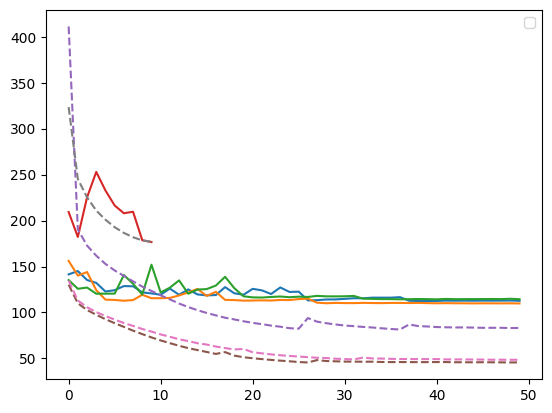

In [58]:
pivot_val = all_results.pivot(columns = 'Model', values='val_mse')
pivot_train = all_results.pivot(columns = 'Model', values='mse')
plt.plot(pivot_val)
plt.plot(pivot_train, linestyle='dashed')
plt.legend()

<AxesSubplot: title={'center': 'Training MSE'}, xlabel='Epochs', ylabel='Training MSE'>

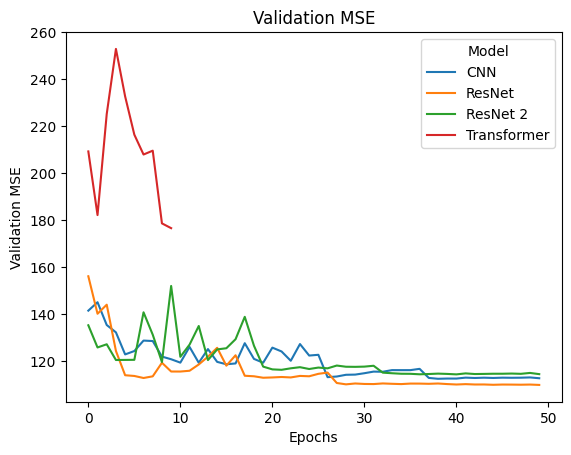

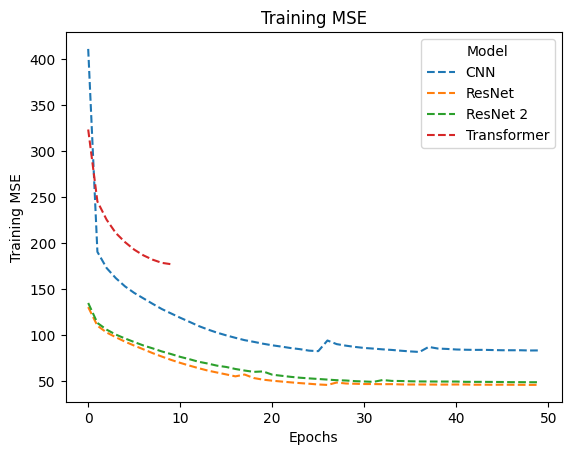

In [60]:
pivot_val.plot(xlabel='Epochs',ylabel='Validation MSE', title='Validation MSE')
pivot_train.plot(xlabel='Epochs',ylabel='Training MSE', title='Training MSE', linestyle='dashed')